In [1]:
import pandas as pd
import numpy as np

In [2]:
df_in= pd.read_csv("C:\\Users\\14830\\Desktop\\HC\\HW4\\VTINP16_upd\\VTINP16_upd.txt")
df_in = df_in.apply(pd.to_numeric,errors='coerce')
df_in["CHRGS"] = pd.to_numeric(df_in["CHRGS"])
df = df_in.copy()

df_in_4insurance = df[df['PPAY'].isin([1,6,7])]
df_in_4insurance['PPAY'].replace({1:'MEDICARE',6: 'Commercial Payers',7: 'Commercial Payers'}, inplace=True)
df_in_4insurance = df_in_4insurance[df_in_4insurance['MDC'].isin([5,8])]

df_in_4insurance_new = df_in_4insurance[['hnum2','intage','sex','CHRGS','PPAY','MDC','DRG','hsa']]
hospitalname= pd.read_excel("CaseStudy_O-D_HospMonopoly.xlsx",sheet_name='Hosp_Destination')
hospitalname.columns = ['hnum2','HospitalName Des','RR Des','RR Name Des']

hsaname = pd.read_excel("C:\\Users\\14830\\Downloads\\CaseStudy_O-D_HospMonopoly.xlsx",sheet_name='HSA_Pt_Origin')
hsaname.columns = ['hsa','HSA Name Org','RR Collapsed Referral Region Org','Name Org','RR Name Org']
df_with_des = pd.merge(df_in_4insurance_new ,hospitalname ,how='left',on=['hnum2'])
df_with_des_org = pd.merge(df_with_des ,hsaname ,how='left',on=['hsa'])
#df_with_des_org = pd.merge(df_in_4insurance_new ,hsaname ,how='left',on=['hsa'])

#df_with_des_org = df[df['PPAY'].isin([1,6,7])]


df_with_des_org['Care_Type'] = np.ones(len(df_with_des_org))
for i in range(len(df_with_des_org)):
    if  df_with_des_org['MDC'].iloc[i]== 5:
        df_with_des_org['Care_Type'].iloc[i] = 'High-end care'
    elif df_with_des_org['MDC'].iloc[i]== 8:
        df_with_des_org['Care_Type'].iloc[i] = 'Low-end care'
    else:  df_with_des_org['Care_Type'].iloc[i] = 'Other care'

df_with_des_org['Payer_Type'] = np.ones(len(df_with_des_org))
for i in range(len(df_with_des_org)):
    if  df_with_des_org['PPAY'].iloc[i]== 'MEDICARE':
        df_with_des_org['Payer_Type'].iloc[i] = 'Low-end Payers'
    elif df_with_des_org['PPAY'].iloc[i]== 'Commercial Payers':
         df_with_des_org['Payer_Type'].iloc[i] = 'High-end Payers'    
    #else:  df_with_des_org['Payer_Type'].iloc[i] = 'Other Payers'

C:\Users\14830\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2,5,8,54,55,73,74,75,76,78) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\14830\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\14830\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [3]:
display(df_with_des_org)


,hnum2,intage,sex,CHRGS,PPAY,MDC,DRG,hsa,HospitalName Des,RR Des,RR Name Des,HSA Name Org,RR Collapsed Referral Region Org,Name Org,RR Name Org,Care_Type,Payer_Type
0,11,14,2.0,120544.05,MEDICARE,8.0,560.0,8,Mount Ascutney Hospital And Health Center,RR4,RR4--Randolph,Middlebury,RR1,Burlington,RR1--Burlington,Low-end care,Low-end Payers
1,11,14,2.0,32325.80,MEDICARE,8.0,561.0,11,Mount Ascutney Hospital And Health Center,RR4,RR4--Randolph,Springfield,RR4,Randolph,RR4--Randolph,Low-end care,Low-end Payers
2,11,13,2.0,71292.00,MEDICARE,8.0,560.0,12,Mount Ascutney Hospital And Health Center,RR4,RR4--Randolph,White River Jct.,RR4,Randolph,RR4--Randolph,Low-end care,Low-end Payers
3,11,14,1.0,77200.65,MEDICARE,8.0,560.0,12,Mount Ascutney Hospital And Health Center,RR4,RR4--Randolph,White River Jct.,RR4,Randolph,RR4--Randolph,Low-end care,Low-end Payers
4,11,14,2.0,12460.00,MEDICARE,8.0,561.0,98,Mount Ascutney Hospital And Health Center,RR4,RR4--Randolph,Out of state,Z_OutState,Z_OutState,Z_OutState,Low-end care,Low-end Payers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11455,5,8,1.0,32241.42,Commercial Payers,5.0,281.0,2,University of Vermont Medical Center (as of 2014),RR1,RR1--Burlington,Burlington,RR1,Burlington,RR1--Burlington,High-end care,High-end Payers
11456,5,7,2.0,9724.80,Commercial Payers,8.0,552.0,98,University of Vermont Medical Center (as of 2014),RR1,RR1--Burlington,Out of state,Z_OutState,Z_OutState,Z_OutState,Low-end care,High-end Payers
11457,5,11,1.0,47748.91,Commercial Payers,5.0,247.0,1,University of Vermont Medical Center (as of 2014),RR1,RR1--Burlington,Barre,RR2,Barre,RR2--Barre,High-end care,High-end Payers
11458,5,11,1.0,70950.28,Commercial Payers,5.0,247.0,2,University of Vermont Medical Center (as of 2014),RR1,RR1--Burlington,Burlington,RR1,Burlington,RR1--Burlington,High-end care,High-end Payers


In [4]:
df_with_des_org["CHRGS"]= df_with_des_org["CHRGS"].fillna(0)

Hos_payer_sum = df_with_des_org.groupby([ 'hnum2','RR Name Des','HospitalName Des','Payer_Type'])["CHRGS"].apply(lambda x : x.astype(int).sum()) \
                  .unstack(fill_value=0) \
                  .reset_index() \
                  .rename_axis(None, axis=1)    
Hos_payer_sum.columns=['hnum2', 'RR Name Des', 'HospitalName Des','High-end Payer Total Expense','Low-end Payer Total Expense']

Hos_payer_count = df_with_des_org.groupby([ 'hnum2','Payer_Type'])["hnum2"].apply(lambda x : x.astype(int).count()) \
                  .unstack(fill_value=0) \
                  .reset_index() \
                  .rename_axis(None, axis=1)
Hos_payer_count.columns=['hnum2', 'High-end Payers Total Patients', 'Low-end Payer Total Patients']


Hos_payer_mean = df_with_des_org.groupby([ 'hnum2','RR Name Des','HospitalName Des','Payer_Type'])["CHRGS"].apply(lambda x : x.astype(int).mean()) \
                  .unstack(fill_value=0) \
                  .reset_index() \
                  .rename_axis(None, axis=1)
Hos_payer_mean.columns=['hnum2', 'RR Name Des', 'HospitalName Des','High-end payer Expense Per Person','Low-end Payer Expense Per Person']


Hos_payer_table = pd.merge(Hos_payer_sum,Hos_payer_count,how='left',on=['hnum2'])
Hos_payer_table = pd.merge(Hos_payer_table,Hos_payer_mean,how='left',on=['hnum2','RR Name Des','HospitalName Des'])
Hos_payer_table = Hos_payer_table.iloc[:,1:]

pd.options.display.float_format = "{:,.2f}".format

df = Hos_payer_table[["HospitalName Des","High-end payer Expense Per Person","Low-end Payer Expense Per Person"]]
display(df)


,HospitalName Des,High-end payer Expense Per Person,Low-end Payer Expense Per Person
0,Northwestern Medical Center,"25,065.01","21,165.48"
1,North Country Hospital And Health Center,"26,361.68","19,585.93"
2,Northeastern Vermont Regional Hospital,"44,108.28","38,665.93"
3,Copley Hospital,"43,404.15","31,689.87"
4,University of Vermont Medical Center (as of 2014),"50,824.12","47,664.07"
5,Central Vermont Hospital,"27,783.72","23,270.53"
6,Rutland Regional Medical Center,"34,622.10","32,574.15"
7,Porter Medical Center,"53,136.25","35,383.35"
8,Gifford Memorial Hospital,"38,976.34","24,266.45"
9,Mount Ascutney Hospital And Health Center,"24,226.43","24,912.41"


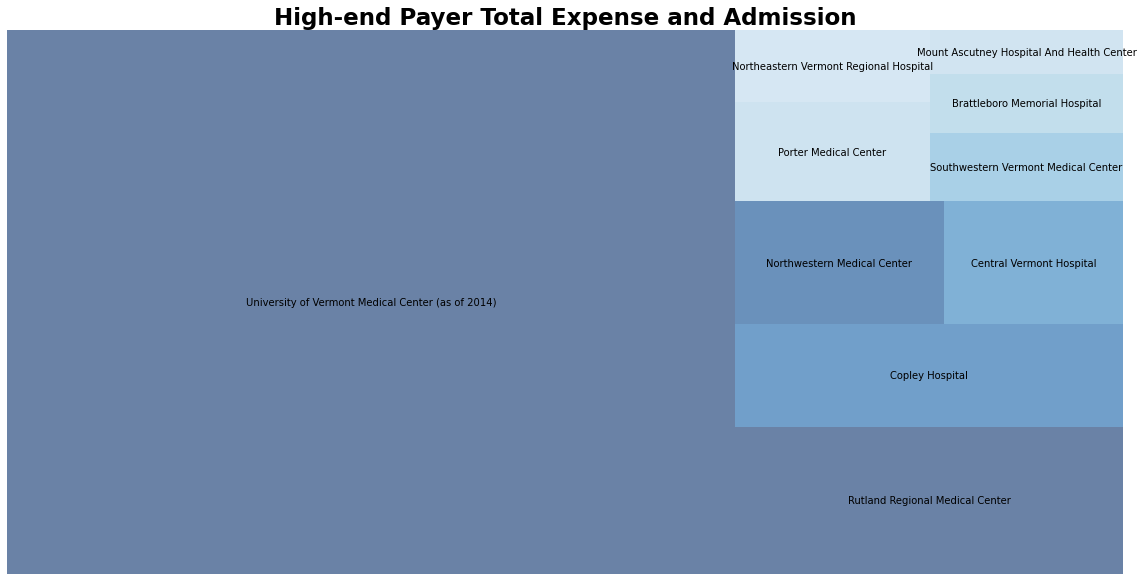

In [5]:
Hos_payer_table_order = Hos_payer_table.sort_values('High-end Payer Total Expense', ascending = False)
Hos_payer_table_order5 =Hos_payer_table_order.iloc[:10,:]

import matplotlib.pyplot as plt
import matplotlib
import squarify 
sizes = list(Hos_payer_table_order5['High-end Payer Total Expense'])
label = list(Hos_payer_table_order5.iloc[:,1])
value = list(Hos_payer_table_order5['High-end Payers Total Patients'])

norm = matplotlib.colors.Normalize(vmin=min(Hos_payer_table_order5['High-end Payer Total Expense']), vmax=max(Hos_payer_table_order5['High-end Payer Total Expense']))
colors = [matplotlib.cm.Blues(value) for value in value]


fig = plt.gcf()
fig.set_size_inches(20, 10)

squarify.plot(label=Hos_payer_table_order5.iloc[:,1],sizes=Hos_payer_table_order5['High-end Payer Total Expense'], color = colors, alpha=.6
              ,text_kwargs={'fontsize':10})
plt.title("High-end Payer Total Expense and Admission",fontsize=23,fontweight="bold")

plt.axis('off')
plt.show()
#Size define by Total Expense, Color define by Total Admission

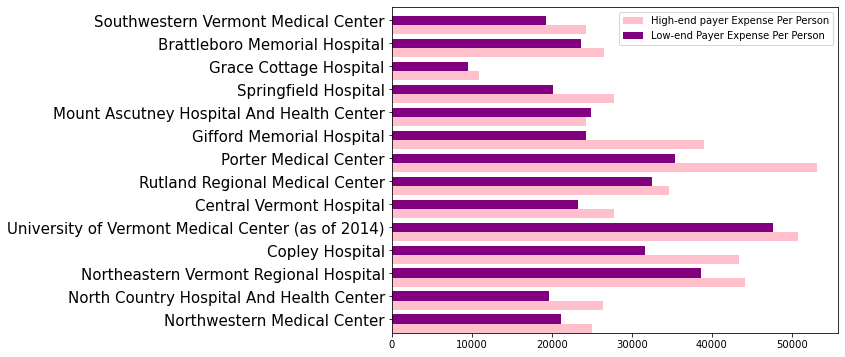

In [6]:
ind = np.arange(len(df))
width = 0.4
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(ind, Hos_payer_table['High-end payer Expense Per Person'], width, color='pink', label='High-end payer Expense Per Person')
ax.barh(ind + width, Hos_payer_table['Low-end Payer Expense Per Person'], width, color='purple', label='Low-end Payer Expense Per Person')

ax.set(yticks=ind + width, yticklabels=Hos_payer_table['HospitalName Des'], ylim=[2*width - 1, len(df)])
ax.legend()
plt.yticks(size = 15)
plt.show()

In [7]:
Hos_care_sum = df_with_des_org.groupby([ 'hnum2','RR Name Des','HospitalName Des','Care_Type'])["CHRGS"].apply(lambda x : x.astype(int).sum()) \
                  .unstack(fill_value=0) \
                  .reset_index() \
                  .rename_axis(None, axis=1)
Hos_care_sum.columns=['hnum2', 'RR Name Des', 'HospitalName Des','High-end Care Total Expense','Low-end Care Total Expense']
  
Hos_care_count = df_with_des_org.groupby([ 'hnum2','Care_Type'])["hnum2"].apply(lambda x : x.astype(int).count()) \
                  .unstack(fill_value=0) \
                  .reset_index() \
                  .rename_axis(None, axis=1)
Hos_care_count.columns=['hnum2', 'High-end Care Total Patients', 'Low-end Care Total Patients']


Hos_care_mean = df_with_des_org.groupby([ 'hnum2','RR Name Des','HospitalName Des','Care_Type'])["CHRGS"].apply(lambda x : x.astype(int).mean()) \
                  .unstack(fill_value=0) \
                  .reset_index() \
                  .rename_axis(None, axis=1)
Hos_care_mean.columns=['hnum2', 'RR Name Des', 'HospitalName Des','High-end Care Expense Per Person','Low-end Care Expense Per Person']

Hos_care_table = pd.merge(Hos_care_sum,Hos_care_count,how='left',on=['hnum2'])
Hos_care_table = pd.merge(Hos_care_table,Hos_care_mean,how='left',on=['hnum2','RR Name Des','HospitalName Des'])
#Hos_care_table = Hos_care_table.iloc[:,1:]

display(Hos_care_table)


,hnum2,RR Name Des,HospitalName Des,High-end Care Total Expense,Low-end Care Total Expense,High-end Care Total Patients,Low-end Care Total Patients,High-end Care Expense Per Person,Low-end Care Expense Per Person
0,1,RR1--Burlington,Northwestern Medical Center,2370516,10746659,214,363,"11,077.18","29,605.12"
1,2,RR3--Newport/St. Jns,North Country Hospital And Health Center,3455969,3492379,208,135,"16,615.24","25,869.47"
2,3,RR3--Newport/St. Jns,Northeastern Vermont Regional Hospital,3018613,10790313,151,196,"19,990.81","55,052.62"
3,4,RR2--Barre,Copley Hospital,893033,21519871,137,493,"6,518.49","43,650.85"
4,5,RR1--Burlington,University of Vermont Medical Center (as of 2014),143541851,92167262,2820,2008,"50,901.37","45,900.03"
5,6,RR2--Barre,Central Vermont Hospital,9142228,13893499,554,401,"16,502.22","34,647.13"
6,8,RR5--Rutland,Rutland Regional Medical Center,11815147,39573062,575,979,"20,548.08","40,421.92"
7,9,RR1--Burlington,Porter Medical Center,1968409,11287737,122,211,"16,134.50","53,496.38"
8,10,RR4--Randolph,Gifford Memorial Hospital,3398308,4537669,177,127,"19,199.48","35,729.68"
9,11,RR4--Randolph,Mount Ascutney Hospital And Health Center,685427,7406739,61,266,"11,236.51","27,844.88"


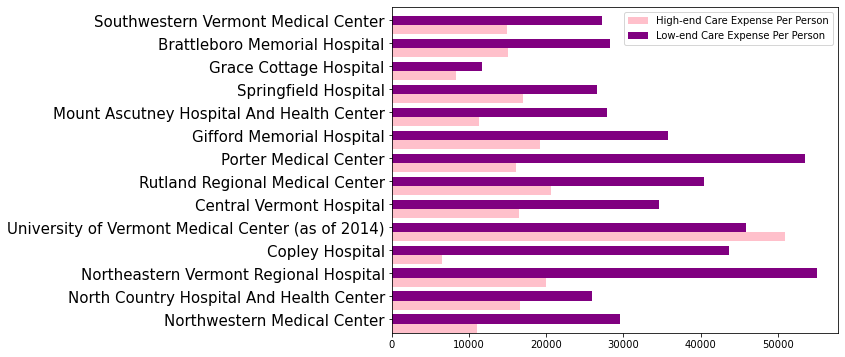

In [8]:
ind = np.arange(len(df))
width = 0.4

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(ind, Hos_care_table['High-end Care Expense Per Person'], width, color='pink', label='High-end Care Expense Per Person')
ax.barh(ind + width, Hos_care_table['Low-end Care Expense Per Person'], width, color='purple', label='Low-end Care Expense Per Person')

ax.set(yticks=ind + width, yticklabels=Hos_care_table['HospitalName Des'], ylim=[2*width - 1, len(df)])
ax.legend()
plt.yticks(size = 15)
plt.show()

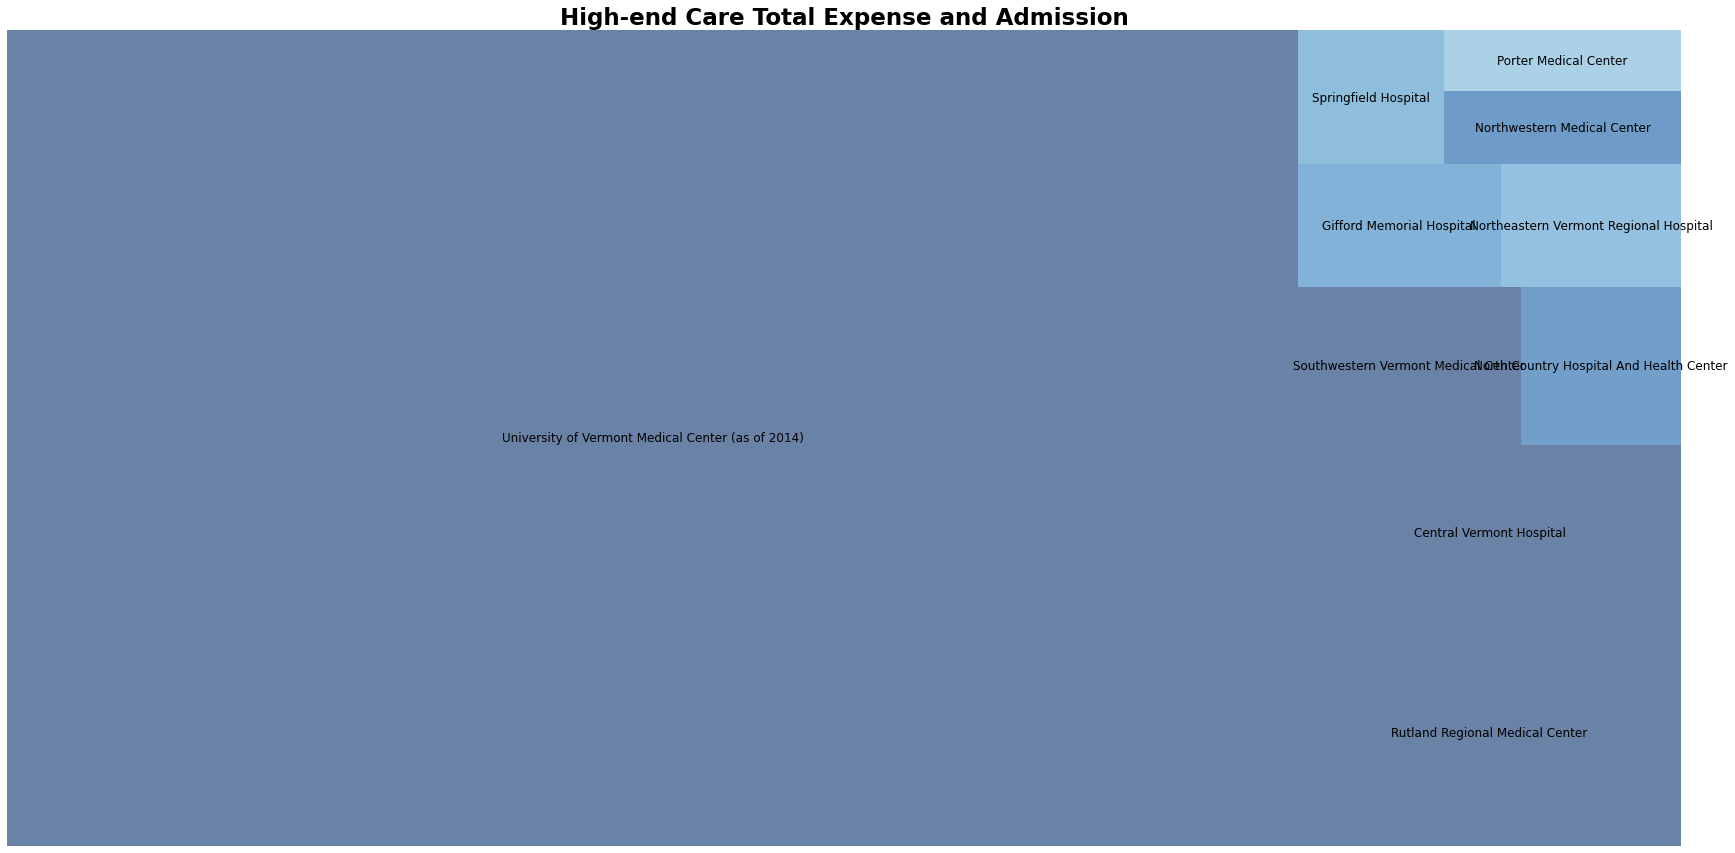

In [9]:
Hos_care_table_order = Hos_care_table.sort_values('High-end Care Total Expense', ascending = False)
Hos_care_table_order5 =Hos_care_table_order.iloc[:10,:]

sizes = list(Hos_care_table_order5['High-end Care Total Expense'])
label = list(Hos_care_table_order5.iloc[:,2])
value = list(Hos_care_table_order5['High-end Care Total Patients'])

norm = matplotlib.colors.Normalize(vmin=min(Hos_care_table_order5['High-end Care Total Expense']), vmax=max(Hos_care_table_order5['High-end Care Total Expense']))
colors = [matplotlib.cm.Blues(value) for value in value]


fig = plt.gcf()
fig.set_size_inches(30, 15)

squarify.plot(label=Hos_care_table_order5.iloc[:,2],sizes=Hos_care_table_order5['High-end Care Total Expense'], color = colors, alpha=.6
              ,text_kwargs={'fontsize':12})
plt.title("High-end Care Total Expense and Admission",fontsize=23,fontweight="bold")

plt.axis('off')
plt.show()
#Size define by Total Expense, Color define by Total Admission

## Part 2 Charges

In [18]:
def piechart_chrgs(df,regionname):
    table = df[df['RR Des'].isin([regionname])]
    bd = table.groupby(['RR Name Org','HospitalName Des'])["CHRGS"].apply(lambda x : x.astype(int).sum()) \
                  .unstack(fill_value=0) \
                  .reset_index() \
                  .rename_axis(None, axis=1)
    sumRow = bd.sum(axis = 1)
    bd['Total Charges'] = sumRow
    sumCol = bd.sum(axis = 0)
    bd = bd.set_index(bd['RR Name Org']) 
    bd = bd.iloc[:,1:]
    bd.loc['Destination Hosp SubTotal:'] = sumCol
    
    perc_bd = bd.iloc[-1,0:len(bd.columns)-1]/sumCol[-1]
    fig, ax = plt.subplots(figsize=(5, 5))
 
    theme = plt.get_cmap('bwr')
    ax.set_prop_cycle("color", [theme(1. * i / len(perc_bd))
                             for i in range(len(perc_bd))])
    ax.pie(perc_bd, labels=perc_bd.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
    return bd

In [22]:
#table 1
low_low = df_with_des_org[(df_with_des_org['Care_Type'] == 'Low-end care') & df_with_des_org['Payer_Type'].isin(['Low-end Payer'])]
ctable1 = low_low.groupby([ 'RR Name Org','RR Name Des'])["CHRGS"].apply(lambda x : x.astype(int).sum()) \
                  .unstack(fill_value=0) \
                  .reset_index() \
                  .rename_axis(None, axis=1)
sumRow = ctable1.sum(axis = 1)
ctable1['Total Charges'] = sumRow
sumCol = ctable1.sum(axis = 0)
ctable1 = ctable1.set_index(ctable1['RR Name Org']) 
ctable1 = ctable1.iloc[:,1:]
ctable1.loc['Destination Hosp SubTotal:'] = sumCol

c_bd1 = piechart_chrgs(low_low,'RR1')
print(c_bd1)

AttributeError: 'Index' object has no attribute 'remove_unused_levels'

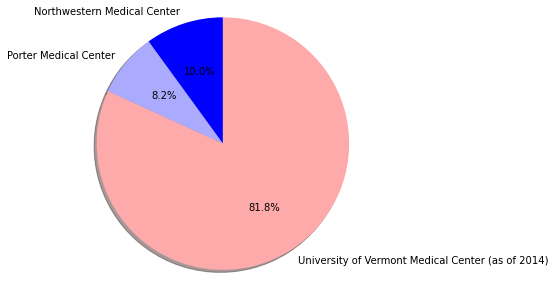

,Northwestern Medical Center,Porter Medical Center,University of Vermont Medical Center (as of 2014),Total Charges
RR Name Org,,,,
RR1--Burlington,4958717,3335221,20994794,29288732
RR2--Barre,0,125582,2493112,2618694
RR3--Newport/St. Jns,0,0,458834,458834
RR4--Randolph,0,0,190520,190520
RR5--Rutland,0,390118,444922,835040
Z_OutState,125185,303602,16966180,17394967
Destination Hosp SubTotal:,5083902,4154523,41548362,50786787


In [14]:
#table 2
low_high = df_with_des_org[(df_with_des_org['Care_Type'] == 'Low-end care') & df_with_des_org['Payer_Type'].isin(['High-end Payers'])]
ctable2 = low_high.groupby([ 'RR Name Org','RR Name Des'])["CHRGS"].apply(lambda x : x.astype(int).sum()) \
                  .unstack(fill_value=0) \
                  .reset_index() \
                  .rename_axis(None, axis=1)
sumRow = ctable2.sum(axis = 1)
ctable2['Total Charges'] = sumRow
sumCol = ctable2.sum(axis = 0)
ctable2 = ctable2.set_index(ctable2['RR Name Org']) 
ctable2 = ctable2.iloc[:,1:]
ctable2.loc['Destination Hosp SubTotal:'] = sumCol

c_bd2 = piechart_chrgs(low_high,'RR1')
display(c_bd2)

In [15]:
#table 3
high_low = df_with_des_org[(df_with_des_org['Care_Type'] == 'High-end care') & df_with_des_org['Payer_Type'].isin(['Low-end Payer'])]
ctable3 = high_low.groupby([ 'RR Name Org','RR Name Des'])["CHRGS"].apply(lambda x : x.astype(int).sum()) \
                  .unstack(fill_value=0) \
                  .reset_index() \
                  .rename_axis(None, axis=1)
sumRow = ctable3.sum(axis = 1)
ctable3['Total Charges'] = sumRow
sumCol = ctable3.sum(axis = 0)
ctable3 = ctable3.set_index(ctable3['RR Name Org']) 
ctable3 = ctable3.iloc[:,1:]
ctable3.loc['Destination Hosp SubTotal:'] = sumCol

c_bd3 = piechart_chrgs(high_low,'RR1')
display(c_bd3)

AttributeError: 'Index' object has no attribute 'remove_unused_levels'

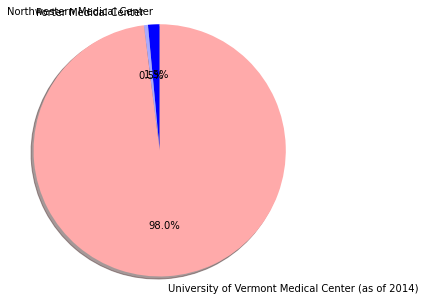

,Northwestern Medical Center,Porter Medical Center,University of Vermont Medical Center (as of 2014),Total Charges
RR Name Org,,,,
RR1--Burlington,720939,230091,20598796,21549826
RR2--Barre,10242,0,5959857,5970099
RR3--Newport/St. Jns,0,0,275092,275092
RR4--Randolph,0,0,680229,680229
RR5--Rutland,0,0,3475070,3475070
Z_OutState,0,25695,17191435,17217130
Destination Hosp SubTotal:,731181,255786,48180479,49167446


In [16]:
#table 4
high_high = df_with_des_org[(df_with_des_org['Care_Type'] == 'High-end care') & df_with_des_org['Payer_Type'].isin(['High-end Payers'])]
ctable4 = high_high.groupby([ 'RR Name Org','RR Name Des'])["CHRGS"].apply(lambda x : x.astype(int).sum()) \
                  .unstack(fill_value=0) \
                  .reset_index() \
                  .rename_axis(None, axis=1)
sumRow = ctable4.sum(axis = 1)
ctable4['Total Charges'] = sumRow
sumCol = ctable4.sum(axis = 0)
ctable4 = ctable4.set_index(ctable4['RR Name Org']) 
ctable4 = ctable4.iloc[:,1:]
ctable4.loc['Destination Hosp SubTotal:'] = sumCol

c_bd4 = piechart_chrgs(high_high,'RR1')
display(c_bd4)

In [23]:
def piechart_DRG_chrgs(df,regionname):
    table = df[df['RR Des'].isin([regionname])]
    bd = table.groupby(['RR Name Org', 'DRG'])["CHRGS"].apply(lambda x : x.astype(int).sum()) \
                  .unstack(fill_value=0) \
                  .reset_index() \
                  .rename_axis(None, axis=1)
    sumRow = bd.sum(axis = 1)
    bd['Total Charges'] = sumRow
    sumCol = bd.sum(axis = 0)
    bd = bd.set_index(bd['RR Name Org']) 
    bd = bd.iloc[:,1:]
    bd.loc['Destination Hosp SubTotal:'] = sumCol
    
    perc_bd = bd.iloc[-1,0:len(bd.columns)-1]/sumCol[-1]
    fig, ax = plt.subplots(figsize=(5, 5))
 
    theme = plt.get_cmap('bwr')
    ax.set_prop_cycle("color", [theme(1. * i / len(perc_bd))
                             for i in range(len(perc_bd))])
    ax.pie(perc_bd, labels=perc_bd.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
    return bd

In [31]:
#table 1
low_low1 = df_with_des_org[(df_with_des_org['Care_Type'] == 'Low-end care') & df_with_des_org['Payer_Type'].isin(['Low-end Payer'])]
ctable_drg1 = low_low1.groupby(['DRG','RR Name Des'])["CHRGS"].apply(lambda x : x.astype(int).sum()) \
                  .unstack(fill_value=0) \
                  .reset_index() \
                  .rename_axis(None, axis=1)

sumRow = ctable_drg1.sum(axis = 1)
ctable_drg1['Total Charges'] = sumRow
sumCol = ctable1.sum(axis = 0)
ctable_drg1 = ctable_drg1.set_index(ctable_drg1['DRG']) 
ctable_drg1 = ctable_drg1.iloc[:,1:]
ctable_drg1  = ctable_drg1.sort_values(by= 'Total Charges', ascending = False).head(10)
ctable_drg1.loc['Destination DRG SubTotal:'] = sumCol
display(ctable_drg1)

c_bd5 = piechart_DRG_chrgs(low_low,'RR1')

AttributeError: 'Index' object has no attribute 'remove_unused_levels'

,RR1--Burlington,RR2--Barre,RR3--Newport/St. Jns,RR4--Randolph,RR5--Rutland,Total Charges
DRG,,,,,,
470.0,"15,339,649.00","6,477,051.00","2,249,087.00","2,684,193.00","6,915,418.00","33,665,868.00"
460.0,"8,211,926.00","1,031,830.00",0.00,0.00,"634,665.00","9,878,881.00"
462.0,"1,881,982.00","1,148,553.00","123,672.00","664,344.00","1,272,861.00","5,091,874.00"
483.0,"1,466,194.00","1,379,638.00",0.00,"115,781.00","228,512.00","3,190,608.00"
494.0,"952,000.00","416,875.00","75,523.00","261,848.00","1,036,415.00","2,743,155.00"
560.0,"984,178.00",0.00,"11,442.00","1,294,147.00","45,989.00","2,336,316.00"
481.0,"1,422,120.00","130,961.00","53,318.00","76,085.00","628,360.00","2,311,325.00"
473.0,"1,667,349.00","284,323.00",0.00,0.00,"242,457.00","2,194,602.00"
493.0,"906,597.00","74,486.00","30,831.00","154,797.00","521,102.00","1,688,306.00"


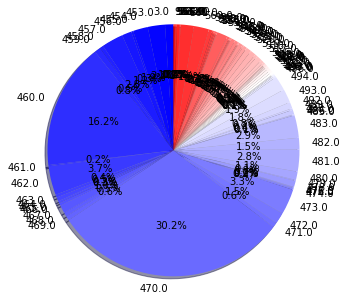

In [30]:
#table 2
low_high1 = df_with_des_org[(df_with_des_org['Care_Type'] == 'Low-end care') & df_with_des_org['Payer_Type'].isin(['High-end Payers'])]
ctable_drg2 = low_high1.groupby(['DRG','RR Name Des'])["CHRGS"].apply(lambda x : x.astype(int).sum()) \
                  .unstack(fill_value=0) \
                  .reset_index() \
                  .rename_axis(None, axis=1)
                  
sumRow = ctable_drg2.sum(axis = 1)
ctable_drg2['Total Charges'] = sumRow
sumCol = ctable_drg2.sum(axis = 0)
ctable_drg2 = ctable_drg2.set_index(ctable_drg2['DRG']) 
ctable_drg2 = ctable_drg2.iloc[:,1:]
ctable_drg2 = ctable_drg2.sort_values(by= 'Total Charges', ascending = False).head(10)
ctable_drg2.loc['Destination DRG SubTotal:'] = sumCol
display(ctable_drg2)

c_bd6 = piechart_DRG_chrgs(low_high1,'RR1')

In [32]:
#table 3
high_low1 = df_with_des_org[(df_with_des_org['Care_Type'] == 'High-end care') & df_with_des_org['Payer_Type'].isin(['Low-end Payer'])]
ctable_drg3 = high_low1.groupby(['DRG','RR Name Des'])["CHRGS"].apply(lambda x : x.astype(int).sum()) \
                  .unstack(fill_value=0) \
                  .reset_index() \
                  .rename_axis(None, axis=1)
                  
sumRow = ctable_drg3.sum(axis = 1)
ctable_drg3['Total Charges'] = sumRow
sumCol = ctable_drg3.sum(axis = 0)
ctable_drg3 = ctable_drg3.set_index(ctable_drg3['DRG']) 
ctable_drg3 = ctable_drg3.iloc[:,1:]
ctable_drg3 = ctable_drg3.sort_values(by= 'Total Charges', ascending = False).head(10)
#ctable_drg3  = ctable_drg3.sort_values(by= 'RR1--Burlington', ascending = False).head(10)  
ctable_drg3.loc['Destination DRG SubTotal:'] = sumCol
display(ctable_drg3)

c_bd7 = piechart_DRG_chrgs(high_low1,'RR1')
#print(c_bd7)

AttributeError: 'Index' object has no attribute 'remove_unused_levels'

,RR1--Burlington,RR2--Barre,RR3--Newport/St. Jns,RR4--Randolph,RR5--Rutland,Total Charges
DRG,,,,,,
247.0,"8,836,611.00",0.00,0.00,0.00,0.00,"8,836,858.00"
219.0,"3,148,675.00",0.00,0.00,0.00,0.00,"3,148,894.00"
246.0,"3,060,098.00",0.00,0.00,0.00,0.00,"3,060,344.00"
220.0,"2,057,032.00",0.00,0.00,0.00,0.00,"2,057,252.00"
235.0,"1,909,067.00",0.00,0.00,0.00,0.00,"1,909,302.00"
267.0,"1,908,170.00",0.00,0.00,0.00,0.00,"1,908,437.00"
981.0,"1,521,762.00",0.00,"76,495.00",0.00,0.00,"1,599,238.00"
236.0,"1,382,482.00",0.00,0.00,0.00,0.00,"1,382,718.00"
234.0,"1,361,963.00",0.00,0.00,0.00,0.00,"1,362,197.00"


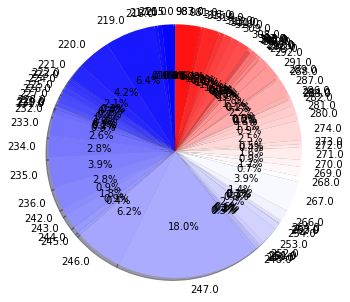

In [33]:
#table 4
high_high1 = df_with_des_org[(df_with_des_org['Care_Type'] == 'High-end care') & df_with_des_org['Payer_Type'].isin(['High-end Payers'])]
ctable_drg4 = high_high1.groupby(['DRG','RR Name Des'])["CHRGS"].apply(lambda x : x.astype(int).sum()) \
                  .unstack(fill_value=0) \
                  .reset_index() \
                  .rename_axis(None, axis=1)
sumRow = ctable_drg4.sum(axis = 1)
ctable_drg4['Total Charges'] = sumRow
sumCol = ctable_drg4.sum(axis = 0)
ctable_drg4 = ctable_drg4.set_index(ctable_drg4['DRG']) 
ctable_drg4 = ctable_drg4.iloc[:,1:]
ctable_drg4 = ctable_drg4.sort_values(by= 'Total Charges', ascending = False).head(10)
ctable_drg4.loc['Destination DRG SubTotal:'] = sumCol
display(ctable_drg4)

c_bd8 = piechart_DRG_chrgs(high_high1,'RR1')